In [1]:
! pip install -U nltk

  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434680 sha256=e0a74cd32f58d95d0f75f15dfcea0a8173cb9d062b043d098eec2006813696a9
  Stored in directory: C:\Users\Sannidhi\AppData\Local\pip\Cache\wheels\ae\8c\3f\b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5


In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [36]:
from nltk.tokenize import word_tokenize
input_txt = 'I am girl. I am studying AI.'
x = word_tokenize(input_txt)
x

['I', 'am', 'girl', '.', 'I', 'am', 'studying', 'AI', '.']

# Spam Collection

In [3]:
# reading data
raw_data = open('SMSSpamCollection').read()
raw_data[0:1000]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\nham\tEven my brother is not like to speak with me. They treat me like aids patent.\nham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\nspam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [4]:
parsed_data = raw_data.replace('\t', '\n').split('\n')
parsed_data

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'spam',
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam',
 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! 

In [5]:
label_list = parsed_data[0::2]
msg_list = parsed_data[1::2]
print("label list", label_list[0:10])
print("msg_list", msg_list[0:10])

label list ['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']
msg_list ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea Â£900 pr

In [6]:
import pandas as pd
print(len(label_list))
print(len(msg_list))


combined_df = pd.DataFrame({'label': label_list[:-1], 'sms': msg_list})
combined_df.head()

5575
5574


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Or second method to read data

In [7]:

pd.set_option('display.max_colwidth', 100)
dataset = pd.read_csv('SMSSpamCollection', sep = '\t', header = None)
dataset.columns = ['label', 'sms']
dataset.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#### Explore the data

In [8]:

# shape of data
print(f'input data has{len(dataset)} rows, {len(dataset.columns)}columns')

#find the ratio of ham vs spam
print(f'ham = {len(dataset[dataset["label"]== "ham"])}')
print(f'spam = {len(dataset[dataset["label"]== "spam"])}')

input data has5572 rows, 2columns
ham = 4825
spam = 747


In [9]:
print(f'Number of missing label = {dataset["label"].isnull().sum()}')
print(f'Number of missing label = {dataset["sms"].isnull().sum()}')
      

Number of missing label = 0
Number of missing label = 0


In [10]:
#Remove Punctuation

"I am teaching NLP" == "I am teaching NLP."

False

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(txt):
    txt_nopunt ="".join( [c for c in txt if c not in string.punctuation])
    return txt_nopunt

In [13]:
dataset['msg_clean'] = dataset['sms'].apply(lambda x: remove_punctuation(x)) 
dataset.head()

,label,sms,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


#### Tokenization

In [14]:
import re
def tokenize(txt):
    tokens = re.split('\W+', txt) # w means word character and W means non-word character
    return tokens

dataset['tokenize_data'] = dataset['msg_clean'].apply(lambda x: tokenize(x.lower()))
dataset.head()
    

,label,sms,msg_clean,tokenize_data
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


#### Removing Stop words

In [15]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')
stop_words[0:10]

# list of stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [50]:
def remove_stopwords(text_t):
    txt = " ".join([word for word in text_t if word not in stop_words])
    return txt

dataset['without stopwords'] = dataset['tokenize_data'].apply(lambda x: remove_stopwords(x))
dataset.head()

,label,sms,msg_clean,tokenize_data,without stopwords,msg_stemmed,msg_lemmatize
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]",u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]",nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


#### Porter Steammer

In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir()

['In',
 'Out',
 'PorterStemmer',
 '_',
 '_1',
 '_10',
 '_11',
 '_13',
 '_14',
 '_15',
 '_16',
 '_2',
 '_3',
 '_4',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'combined_df',
 'dataset',
 'exit',
 'get_ipython',
 'input_txt',
 'label_list',
 'msg_list',
 'nltk',
 'parsed_data',
 'pd',
 'ps',
 'quit',
 'raw_data',
 're',
 'remove_punctuation',
 'remove_stopwords',
 'stop_words',
 'string',
 'tokenize',
 'word_tokenize',
 'x']

In [18]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code


In [19]:
def stemming(text):
    text1 = [ps.stem(word) for word in text]
    return text

dataset['msg_stemmed'] = dataset['without stopwords'].apply(lambda x: stemming(x))
dataset.head()

,label,sms,msg_clean,tokenize_data,without stopwords,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goes, usf, lives, around, though]"


#### WordNetLemmatizer

In [20]:
wn =nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
dir()

['In',
 'Out',
 'PorterStemmer',
 '_',
 '_1',
 '_10',
 '_11',
 '_13',
 '_14',
 '_15',
 '_16',
 '_17',
 '_19',
 '_2',
 '_3',
 '_4',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'combined_df',
 'dataset',
 'exit',
 'get_ipython',
 'input_txt',
 'label_list',
 'msg_list',
 'nltk',
 'parsed_data',
 'pd',
 'ps',
 'quit',
 'raw_data',
 're',
 'remove_punctuation',
 'remove_stopwords',
 'stemming',
 'stop_words',
 'string',
 'tokenize',
 'wn',
 'word_tokenize',
 'x']

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sannidhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
wn =nltk.WordNetLemmatizer()
def lemmatization(txt):
    text = [wn.lemmatize(word) for word in txt if word not in stop_words]
    return text

dataset['msg_lemmatize'] = dataset['msg_stemmed'].apply(lambda x: lemmatization(x))
dataset.head()

,label,sms,msg_clean,tokenize_data,without stopwords,msg_stemmed,msg_lemmatize
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"


#### Count Vectorization

In [35]:
#Small example


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = ['It is very nice. Its a beautiful. It is in good shape']

x = cv.fit(corpus)
print(x.vocabulary_)
print(cv.get_feature_names())

x = cv.transform(corpus)
print(x.shape)
print(x.toarray())

{'it': 4, 'is': 3, 'very': 8, 'nice': 6, 'its': 5, 'beautiful': 0, 'in': 2, 'good': 1, 'shape': 7}
['beautiful', 'good', 'in', 'is', 'it', 'its', 'nice', 'shape', 'very']
(1, 9)
[[1 1 1 2 2 1 1 1 1]]


In [45]:
# on spamsmscollection

cv1 = CountVectorizer(analyzer = lemmatization)
x = cv1.fit_transform(dataset['sms'])
print(x.shape)

(5572, 110)


In [46]:
print(cv1.get_feature_names())

['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n', 'p', 'q', 'r', 'u', 'v', 'w', 'x', 'z', '|', '~', '\x91', '\x92', '\x93', '\x94', '\x96', '¡', '£', '»', 'É', 'Ü', 'è', 'é', 'ì', 'ú', 'ü', '–', '—', '‘', '’', '“', '…', '┾', '〨', '鈥']


#### N-grams Vectorization

In [57]:
#Small example


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1,3))

corpus = ['It is very nice. Its a beautiful. It is in good shape']

x = cv.fit_transform(corpus)
df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
df

,beautiful,beautiful it,beautiful it is,good,good shape,in,in good,in good shape,is,is in,...,its,its beautiful,its beautiful it,nice,nice its,nice its beautiful,shape,very,very nice,very nice its
0,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1


In [61]:
# on spamsmscollection
cv1 = CountVectorizer(ngram_range = (2,3))
x = cv1.fit_transform(dataset['without stopwords'])
print(x.shape)
df = pd.DataFrame(x.toarray(), columns = cv1.get_feature_names())
df

(5572, 63747)


,008704050406 sp,008704050406 sp arrow,0089my last,0089my last four,0121 2025050,0121 2025050 visit,01223585236 xx,01223585236 xx luv,01223585334 cum,01223585334 cum wan,...,zouk nichols parisfree,zyada kisi,zyada kisi ko,üll finish,üll finish buying,üll submitting,üll submitting da,üll take,üll take forever,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF 

In [63]:
# Small Example

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

corpus = ['It is very nice. Its a beautiful. It is in good shape']

x = tf_idf.fit(corpus)
print(x.vocabulary_)
print(tf_idf.get_feature_names())

x = tf_idf.transform(corpus)

df = pd.DataFrame(x.toarray(), columns = tf_idf.get_feature_names())
df


{'it': 4, 'is': 3, 'very': 8, 'nice': 6, 'its': 5, 'beautiful': 0, 'in': 2, 'good': 1, 'shape': 7}
['beautiful', 'good', 'in', 'is', 'it', 'its', 'nice', 'shape', 'very']


,beautiful,good,in,is,it,its,nice,shape,very
0,0.258199,0.258199,0.258199,0.516398,0.516398,0.258199,0.258199,0.258199,0.258199


In [67]:
# sMSSPAMCOLECTION
data_sample = dataset[0:10]

tfidf2 = TfidfVectorizer(analyzer = remove_stopwords)
x = tfidf2.fit_transform(data_sample['without stopwords'])
print(x.shape)

df = pd.DataFrame(x.toarray(), columns = tfidf2.get_feature_names())
df

(10, 29)


,,0,1,2,3,4,5,6,7,8,...,l,n,p,q,r,u,v,w,x,z
0,0.975426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.056546,0.056546,0.020526,0.000000,0.070683,0.046452,0.018638,0.045411,0.000000,0.032504
1,0.966943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.048347,0.096694,0.000000,0.000000,0.048347,0.052955,0.000000,0.077652,0.000000,0.000000
2,0.972179,0.074944,0.074944,0.084295,0.000000,0.019270,0.057810,0.000000,0.038540,0.077080,...,0.025143,0.041904,0.048676,0.019270,0.050285,0.018359,0.022100,0.026922,0.038540,0.000000
3,0.979331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.069952,0.034976,0.000000,0.000000,0.104928,0.114929,0.000000,0.000000,0.000000,0.000000
4,0.963845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029207,0.116830,0.000000,0.000000,0.029207,0.095974,0.038509,0.000000,0.000000,0.000000
5,0.979028,0.021887,0.021887,0.000000,0.024618,0.000000,0.028138,0.000000,0.000000,0.000000,...,0.048951,0.036714,0.000000,0.000000,0.048951,0.013404,0.016135,0.039311,0.084415,0.000000
6,0.953920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052996,0.052996,0.076949,0.000000,0.079493,0.000000,0.034936,0.000000,0.000000,0.000000
7,0.960461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100048,0.100048,0.043580,0.023004,0.090043,0.087667,0.013191,0.000000,0.000000,0.000000
8,0.968686,0.082498,0.082498,0.018558,0.018558,0.042424,0.000000,0.042424,0.021212,0.000000,...,0.073805,0.027677,0.013395,0.000000,0.073805,0.030315,0.036491,0.044453,0.000000,0.021212
9,0.969348,0.096313,0.038525,0.021666,0.021666,0.000000,0.000000,0.024764,0.000000,0.049529,...,0.086164,0.021541,0.031277,0.000000,0.053853,0.047188,0.000000,0.000000,0.000000,0.000000


#### Feature Engineering

In [70]:
dataset['msg_length'] = dataset['sms'].apply(lambda x: len(x))
dataset.head()

,label,sms,msg_clean,tokenize_data,without stopwords,msg_stemmed,msg_lemmatize,msg_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",111
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",155
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]",u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]",nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",61


In [77]:
# Create Feature: punctuation usage
import string
def punctuation_count(txt):
    count = sum([1 for i in txt if i in string.punctuation])
    return 100*count/len(txt)

dataset['punctuation_%'] = dataset['sms'].apply(lambda x: punctuation_count(x))
dataset.head()

,label,sms,msg_clean,tokenize_data,without stopwords,msg_stemmed,msg_lemmatize,msg_length,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,"[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",111,8.108108
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",155,3.870968
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]",u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]",nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",61,3.278689


#### plot message length for spam and ham

C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


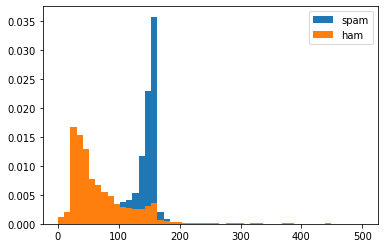

In [90]:
from matplotlib import pyplot
import numpy as np

bins = np.linspace(0, 500, 50)
pyplot.hist(dataset[dataset['label'] == 'spam']['msg_length'], bins, label = 'spam', normed =True)
pyplot.hist(dataset[dataset['label'] == 'ham']['msg_length'], bins, label = 'ham', normed = True)
pyplot.legend(loc = 'upper right')
pyplot.show()

#### evaluation punctuation %

C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Sannidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


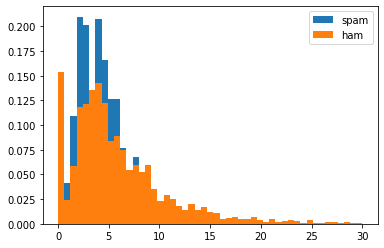

In [92]:
bins = np.linspace(0, 30, 50)
pyplot.hist(dataset[dataset['label'] == 'spam']['punctuation_%'], bins, label = 'spam', normed =True)
pyplot.hist(dataset[dataset['label'] == 'ham']['punctuation_%'], bins, label = 'ham', normed = True)
pyplot.legend(loc = 'upper right')
pyplot.show()

#### Plot new features

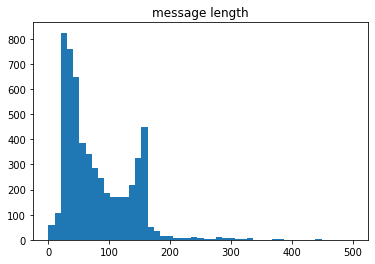

In [95]:
bins = np.linspace(0, 250, 50)
pyplot.hist(dataset['msg_length'], bins)
pyplot.title('message length')
pyplot.show()

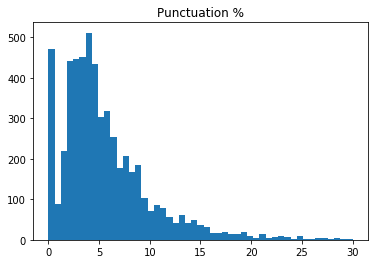

In [97]:
bins = np.linspace(0, 30, 50)
pyplot.hist(dataset['punctuation_%'], bins)
pyplot.title('Punctuation %')
pyplot.show()

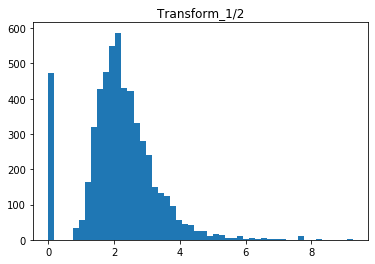

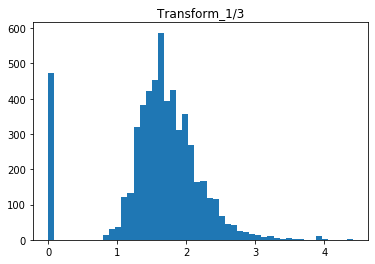

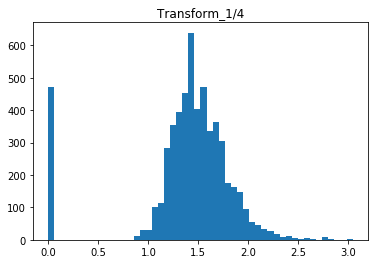

In [100]:
for i in[2, 3, 4]:
    pyplot.hist((dataset['punctuation_%'])** (1/i), bins = 50)
    pyplot.title(f'Transform_1/{i}')
    pyplot.show()